In [1084]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
import os
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf


In [1085]:
plt.style.use('fivethirtyeight')

In [1086]:
# general settings
class CFG:
    data_path = './../data'
    img_dim1 = 20
    img_dim2 = 10
    
    
# adjust the parameters for displayed figures    
plt.rcParams.update({'figure.figsize': (CFG.img_dim1,CFG.img_dim2)})  

## NSW Forecast Demand

In [1087]:
nsw_forecastdemand = pd.read_csv(
    os.path.join(CFG.data_path, 'NSW', 'forecastdemand_nsw.csv'), 
    parse_dates=['LASTCHANGED', 'DATETIME']
)

In [1088]:
nsw_forecastdemand.head()

,PREDISPATCHSEQNO,REGIONID,PERIODID,FORECASTDEMAND,LASTCHANGED,DATETIME
0,2009123018,NSW1,71,7832.04,2009-12-30 12:31:49,2010-01-01
1,2009123019,NSW1,70,7832.04,2009-12-30 13:01:43,2010-01-01
2,2009123020,NSW1,69,7832.03,2009-12-30 13:31:36,2010-01-01
3,2009123021,NSW1,68,7832.03,2009-12-30 14:01:44,2010-01-01
4,2009123022,NSW1,67,7830.96,2009-12-30 14:31:35,2010-01-01


In [1089]:
nsw_forecastdemand.tail()

,PREDISPATCHSEQNO,REGIONID,PERIODID,FORECASTDEMAND,LASTCHANGED,DATETIME
10906014,2021031736,NSW1,5,7028.45,2021-03-17 21:31:31,2021-03-18
10906015,2021031737,NSW1,4,7041.65,2021-03-17 22:01:34,2021-03-18
10906016,2021031738,NSW1,3,7087.60,2021-03-17 22:31:36,2021-03-18
10906017,2021031739,NSW1,2,7087.28,2021-03-17 23:01:36,2021-03-18
10906018,2021031740,NSW1,1,7126.37,2021-03-17 23:31:33,2021-03-18


In [1090]:
nsw_forecastdemand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10906019 entries, 0 to 10906018
Data columns (total 6 columns):
 #   Column            Dtype         
---  ------            -----         
 0   PREDISPATCHSEQNO  int64         
 1   REGIONID          object        
 2   PERIODID          int64         
 3   FORECASTDEMAND    float64       
 4   LASTCHANGED       datetime64[ns]
 5   DATETIME          datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 499.2+ MB


In [1091]:
nsw_forecastdemand['FORECASTDEMAND'].describe()

count    1.090602e+07
mean     8.066719e+03
std      1.315959e+03
min      4.422460e+03
25%      7.077970e+03
50%      8.007550e+03
75%      8.925610e+03
max      1.473666e+04
Name: FORECASTDEMAND, dtype: float64

In [1092]:
nsw_forecastdemand.shape

(10906019, 6)

In [1093]:
nsw_forecastdemand.min()

PREDISPATCHSEQNO             2009123018
REGIONID                           NSW1
PERIODID                              1
FORECASTDEMAND                  4422.46
LASTCHANGED         2009-12-30 12:31:49
DATETIME            2010-01-01 00:00:00
dtype: object

In [1094]:
nsw_forecastdemand.max()

PREDISPATCHSEQNO             2021031740
REGIONID                           NSW1
PERIODID                             79
FORECASTDEMAND                 14736.66
LASTCHANGED         2021-03-17 23:31:33
DATETIME            2021-03-18 00:00:00
dtype: object

In [1095]:
nsw_forecastdemand.isnull().sum()

PREDISPATCHSEQNO    0
REGIONID            0
PERIODID            0
FORECASTDEMAND      0
LASTCHANGED         0
DATETIME            0
dtype: int64

In [1096]:
nsw_forecastdemand.isna().sum()

PREDISPATCHSEQNO    0
REGIONID            0
PERIODID            0
FORECASTDEMAND      0
LASTCHANGED         0
DATETIME            0
dtype: int64

In [1097]:
nsw_forecastdemand.nunique()

PREDISPATCHSEQNO    196571
REGIONID                 1
PERIODID                79
FORECASTDEMAND      681384
LASTCHANGED         196571
DATETIME            196513
dtype: int64

In [1098]:
nsw_forecastdemand.dtypes

PREDISPATCHSEQNO             int64
REGIONID                    object
PERIODID                     int64
FORECASTDEMAND             float64
LASTCHANGED         datetime64[ns]
DATETIME            datetime64[ns]
dtype: object

## NSW temperature

In [1099]:
nsw_temperature = pd.read_csv(
    os.path.join(CFG.data_path, 'NSW', 'temperature_nsw.csv'), 
    parse_dates=['DATETIME'], 
    dayfirst=True
)

In [1100]:
nsw_temperature.head(10)

,LOCATION,DATETIME,TEMPERATURE
0,Bankstown,2010-01-01 00:00:00,23.1
1,Bankstown,2010-01-01 00:01:00,23.1
2,Bankstown,2010-01-01 00:30:00,22.9
3,Bankstown,2010-01-01 00:50:00,22.7
4,Bankstown,2010-01-01 01:00:00,22.6
5,Bankstown,2010-01-01 01:30:00,22.5
6,Bankstown,2010-01-01 02:00:00,22.5
7,Bankstown,2010-01-01 02:30:00,22.4
8,Bankstown,2010-01-01 03:00:00,22.3
9,Bankstown,2010-01-01 03:30:00,22.3


In [1101]:
nsw_temperature.tail(10)

,LOCATION,DATETIME,TEMPERATURE
220316,Bankstown,2021-03-17 21:00:00,19.2
220317,Bankstown,2021-03-17 21:01:00,18.4
220318,Bankstown,2021-03-17 21:30:00,19.7
220319,Bankstown,2021-03-17 22:00:00,19.7
220320,Bankstown,2021-03-17 22:30:00,19.5
220321,Bankstown,2021-03-17 23:00:00,19.1
220322,Bankstown,2021-03-17 23:20:00,19.0
220323,Bankstown,2021-03-17 23:30:00,18.8
220324,Bankstown,2021-03-17 23:34:00,18.8
220325,Bankstown,2021-03-18 00:00:00,18.6


In [1102]:
nsw_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220326 entries, 0 to 220325
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   LOCATION     220326 non-null  object        
 1   DATETIME     220326 non-null  datetime64[ns]
 2   TEMPERATURE  220326 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 5.0+ MB


In [1103]:
nsw_temperature['TEMPERATURE'].describe()

count    220326.000000
mean         17.418827
std           5.849763
min          -1.300000
25%          13.400000
50%          17.700000
75%          21.300000
max          44.700000
Name: TEMPERATURE, dtype: float64

In [1104]:
nsw_temperature.shape

(220326, 3)

In [1105]:
nsw_temperature.min()

LOCATION                 Bankstown
DATETIME       2010-01-01 00:00:00
TEMPERATURE                   -1.3
dtype: object

In [1106]:
nsw_temperature.max()

LOCATION                 Bankstown
DATETIME       2021-03-18 00:00:00
TEMPERATURE                   44.7
dtype: object

In [1107]:
nsw_temperature.isnull().sum()

LOCATION       0
DATETIME       0
TEMPERATURE    0
dtype: int64

In [1108]:
nsw_temperature.isna().sum()

LOCATION       0
DATETIME       0
TEMPERATURE    0
dtype: int64

In [1109]:
nsw_temperature.nunique()

LOCATION            1
DATETIME       220313
TEMPERATURE       439
dtype: int64

In [1110]:
nsw_temperature.dtypes

LOCATION               object
DATETIME       datetime64[ns]
TEMPERATURE           float64
dtype: object

## NSW Total Demand

In [1111]:
nsw_totaldemand = pd.read_csv(
    os.path.join(CFG.data_path, 'NSW', 'totaldemand_nsw.csv'), 
    parse_dates=['DATETIME'], 
    dayfirst=True
)

In [1112]:
nsw_totaldemand.head()

,DATETIME,TOTALDEMAND,REGIONID
0,2010-01-01 00:00:00,8038.00,NSW1
1,2010-01-01 00:30:00,7809.31,NSW1
2,2010-01-01 01:00:00,7483.69,NSW1
3,2010-01-01 01:30:00,7117.23,NSW1
4,2010-01-01 02:00:00,6812.03,NSW1


In [1113]:
nsw_totaldemand.tail()

,DATETIME,TOTALDEMAND,REGIONID
196508,2021-03-17 22:00:00,7419.77,NSW1
196509,2021-03-17 22:30:00,7417.91,NSW1
196510,2021-03-17 23:00:00,7287.32,NSW1
196511,2021-03-17 23:30:00,7172.39,NSW1
196512,2021-03-18 00:00:00,7094.51,NSW1


In [1114]:
nsw_totaldemand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196513 entries, 0 to 196512
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   DATETIME     196513 non-null  datetime64[ns]
 1   TOTALDEMAND  196513 non-null  float64       
 2   REGIONID     196513 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.5+ MB


In [1115]:
nsw_totaldemand['TOTALDEMAND'].describe()

count    196513.000000
mean       8113.145859
std        1299.532774
min        5074.630000
25%        7150.070000
50%        8053.230000
75%        8958.550000
max       14579.860000
Name: TOTALDEMAND, dtype: float64

In [1116]:
nsw_totaldemand.shape

(196513, 3)

In [1117]:
nsw_totaldemand.min()

DATETIME       2010-01-01 00:00:00
TOTALDEMAND                5074.63
REGIONID                      NSW1
dtype: object

In [1118]:
nsw_totaldemand.max()

DATETIME       2021-03-18 00:00:00
TOTALDEMAND               14579.86
REGIONID                      NSW1
dtype: object

In [1119]:
nsw_totaldemand.isnull().sum()

DATETIME       0
TOTALDEMAND    0
REGIONID       0
dtype: int64

In [1120]:
nsw_totaldemand.isna().sum()

DATETIME       0
TOTALDEMAND    0
REGIONID       0
dtype: int64

In [1121]:
nsw_totaldemand.nunique()

DATETIME       196513
TOTALDEMAND    160515
REGIONID            1
dtype: int64

In [1122]:
nsw_totaldemand.dtypes

DATETIME       datetime64[ns]
TOTALDEMAND           float64
REGIONID               object
dtype: object

## merge step 1

In [1123]:
merged_df = pd.merge(
    nsw_totaldemand[['DATETIME', 'TOTALDEMAND', 'REGIONID']], 
    nsw_forecastdemand[['PREDISPATCHSEQNO', 'REGIONID', 'PERIODID', 'FORECASTDEMAND', 'LASTCHANGED', 'DATETIME']], 
    on=['DATETIME', 'REGIONID'], 
    how='outer'
)
merged_df.head()

,DATETIME,TOTALDEMAND,REGIONID,PREDISPATCHSEQNO,PERIODID,FORECASTDEMAND,LASTCHANGED
0,2010-01-01,8038.0,NSW1,2009123018,71,7832.04,2009-12-30 12:31:49
1,2010-01-01,8038.0,NSW1,2009123019,70,7832.04,2009-12-30 13:01:43
2,2010-01-01,8038.0,NSW1,2009123020,69,7832.03,2009-12-30 13:31:36
3,2010-01-01,8038.0,NSW1,2009123021,68,7832.03,2009-12-30 14:01:44
4,2010-01-01,8038.0,NSW1,2009123022,67,7830.96,2009-12-30 14:31:35


In [1124]:
merged_df.isnull().sum()

DATETIME            0
TOTALDEMAND         0
REGIONID            0
PREDISPATCHSEQNO    0
PERIODID            0
FORECASTDEMAND      0
LASTCHANGED         0
dtype: int64

## merge step 2

In [1125]:
nsw_df = pd.merge(
    merged_df, 
    nsw_temperature[['LOCATION', 'DATETIME', 'TEMPERATURE']], 
    on='DATETIME', 
    how='inner'
)

## Quick Check of merged df

In [1126]:
nsw_df.isnull().sum()

DATETIME            0
TOTALDEMAND         0
REGIONID            0
PREDISPATCHSEQNO    0
PERIODID            0
FORECASTDEMAND      0
LASTCHANGED         0
LOCATION            0
TEMPERATURE         0
dtype: int64

In [1127]:
nsw_df.head(5)

,DATETIME,TOTALDEMAND,REGIONID,PREDISPATCHSEQNO,PERIODID,FORECASTDEMAND,LASTCHANGED,LOCATION,TEMPERATURE
0,2010-01-01,8038.0,NSW1,2009123018,71,7832.04,2009-12-30 12:31:49,Bankstown,23.1
1,2010-01-01,8038.0,NSW1,2009123019,70,7832.04,2009-12-30 13:01:43,Bankstown,23.1
2,2010-01-01,8038.0,NSW1,2009123020,69,7832.03,2009-12-30 13:31:36,Bankstown,23.1
3,2010-01-01,8038.0,NSW1,2009123021,68,7832.03,2009-12-30 14:01:44,Bankstown,23.1
4,2010-01-01,8038.0,NSW1,2009123022,67,7830.96,2009-12-30 14:31:35,Bankstown,23.1


In [1128]:
nsw_df.tail(5)

,DATETIME,TOTALDEMAND,REGIONID,PREDISPATCHSEQNO,PERIODID,FORECASTDEMAND,LASTCHANGED,LOCATION,TEMPERATURE
10875931,2021-03-18,7094.51,NSW1,2021031736,5,7028.45,2021-03-17 21:31:31,Bankstown,18.6
10875932,2021-03-18,7094.51,NSW1,2021031737,4,7041.65,2021-03-17 22:01:34,Bankstown,18.6
10875933,2021-03-18,7094.51,NSW1,2021031738,3,7087.60,2021-03-17 22:31:36,Bankstown,18.6
10875934,2021-03-18,7094.51,NSW1,2021031739,2,7087.28,2021-03-17 23:01:36,Bankstown,18.6
10875935,2021-03-18,7094.51,NSW1,2021031740,1,7126.37,2021-03-17 23:31:33,Bankstown,18.6


In [1133]:
nsw_df.shape

(10875936, 9)

In [1129]:
nsw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10875936 entries, 0 to 10875935
Data columns (total 9 columns):
 #   Column            Dtype         
---  ------            -----         
 0   DATETIME          datetime64[ns]
 1   TOTALDEMAND       float64       
 2   REGIONID          object        
 3   PREDISPATCHSEQNO  int64         
 4   PERIODID          int64         
 5   FORECASTDEMAND    float64       
 6   LASTCHANGED       datetime64[ns]
 7   LOCATION          object        
 8   TEMPERATURE       float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(2)
memory usage: 746.8+ MB


In [1130]:
# nsw_df.min()

In [1131]:
# nsw_df.max()

In [1132]:
nsw_df.describe()

,DATETIME,TOTALDEMAND,PREDISPATCHSEQNO,PERIODID,FORECASTDEMAND,LASTCHANGED,TEMPERATURE
count,10875936,1.087594e+07,1.087594e+07,1.087594e+07,1.087594e+07,10875936,1.087594e+07
mean,2015-08-12 04:46:37.677055488,8.068822e+03,2.015182e+09,2.998090e+01,8.065356e+03,2015-08-11 13:48:30.096613888,1.734190e+01
min,2010-01-01 00:00:00,5.074630e+03,2.009123e+09,1.000000e+00,4.422460e+03,2009-12-30 12:31:49,-1.300000e+00
25%,2012-10-23 20:00:00,7.096550e+03,2.012102e+09,1.400000e+01,7.077090e+03,2012-10-23 03:31:23,1.330000e+01
50%,2015-08-10 12:30:00,8.000520e+03,2.015081e+09,2.800000e+01,8.006240e+03,2015-08-09 20:01:29,1.770000e+01
75%,2018-06-01 06:30:00,8.913610e+03,2.018053e+09,4.400000e+01,8.923600e+03,2018-05-31 16:31:25,2.130000e+01
max,2021-03-18 00:00:00,1.457986e+04,2.021032e+09,7.900000e+01,1.473666e+04,2021-03-17 23:31:33,4.470000e+01
std,NaN,1.308772e+03,3.233143e+06,1.869701e+01,1.315479e+03,NaN,5.819157e+00


In [1134]:
nsw_df.nunique()

DATETIME            195934
TOTALDEMAND         160133
REGIONID                 1
PREDISPATCHSEQNO    196435
PERIODID                79
FORECASTDEMAND      681046
LASTCHANGED         196435
LOCATION                 1
TEMPERATURE            438
dtype: int64

In [1135]:
nsw_df.dtypes

DATETIME            datetime64[ns]
TOTALDEMAND                float64
REGIONID                    object
PREDISPATCHSEQNO             int64
PERIODID                     int64
FORECASTDEMAND             float64
LASTCHANGED         datetime64[ns]
LOCATION                    object
TEMPERATURE                float64
dtype: object

In [1136]:
nsw_df.isna().sum()

DATETIME            0
TOTALDEMAND         0
REGIONID            0
PREDISPATCHSEQNO    0
PERIODID            0
FORECASTDEMAND      0
LASTCHANGED         0
LOCATION            0
TEMPERATURE         0
dtype: int64

In [1138]:
nsw_df.to_parquet(
    os.path.join(CFG.data_path, 'NSW', 'nsw_df.parquet')
)  # once the data is cleaned and merged, save it as a parquet file.

## 

## Plots

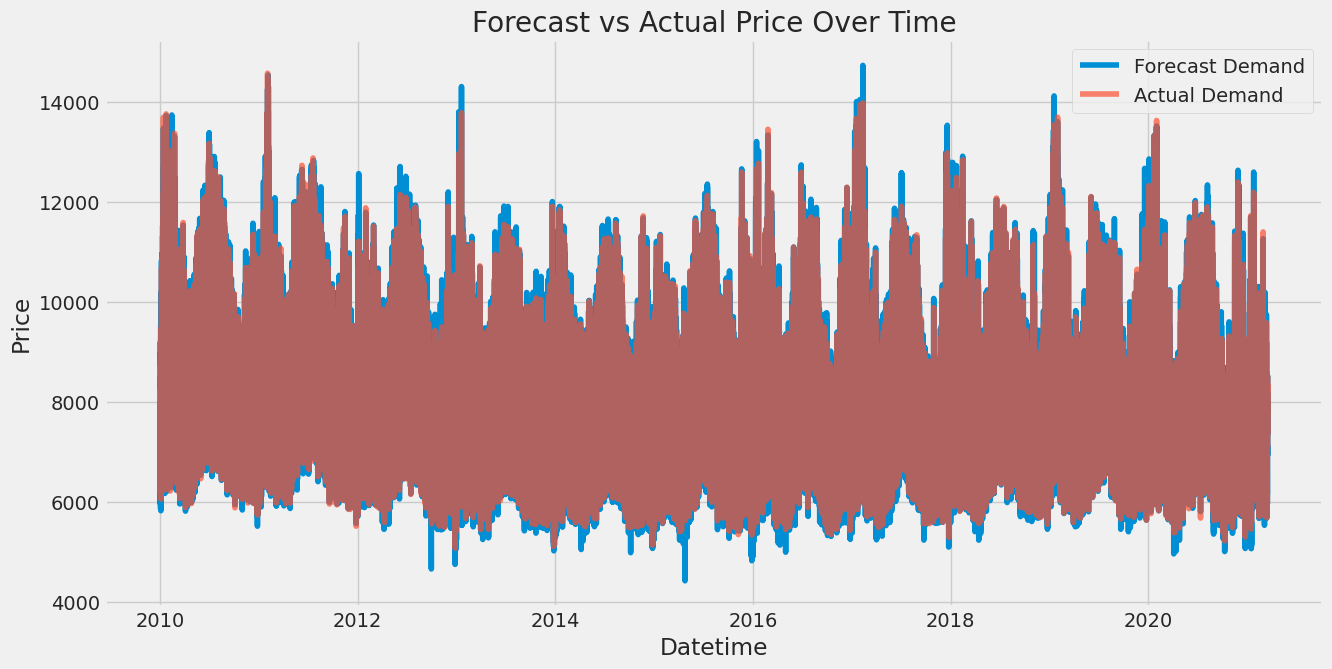

In [1139]:
plt.figure(figsize=(14, 7))
plt.plot(nsw_df['DATETIME'], nsw_df['FORECASTDEMAND'], label='Forecast Demand')
plt.plot(nsw_df['DATETIME'], nsw_df['TOTALDEMAND'], label='Actual Demand', alpha=0.7)
plt.xlabel('Datetime')
plt.ylabel('Price')
plt.title('Forecast vs Actual Price Over Time')
plt.legend()
plt.show()

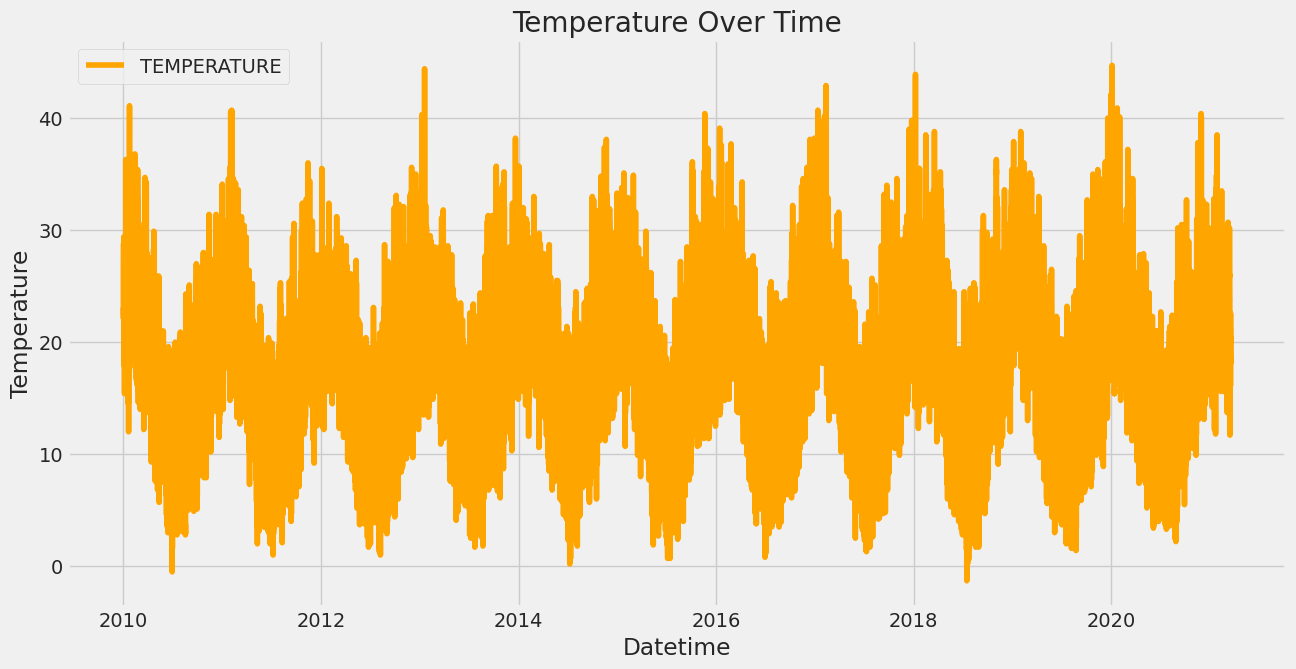

In [1140]:
plt.figure(figsize=(14, 7))
plt.plot(nsw_df['DATETIME'], nsw_df['TEMPERATURE'], color='orange', label='TEMPERATURE')
plt.xlabel('Datetime')
plt.ylabel('Temperature')
plt.title('Temperature Over Time')
plt.legend()
plt.show()

## scatter plot

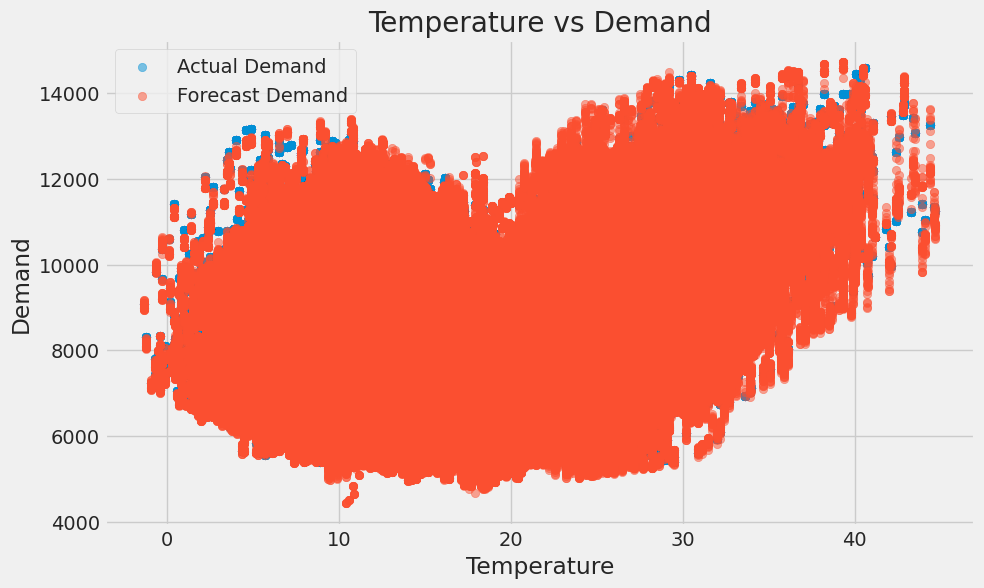

In [1141]:
plt.figure(figsize=(10, 6))
plt.scatter(nsw_df['TEMPERATURE'], nsw_df['TOTALDEMAND'], label='Actual Demand', alpha=0.5)
plt.scatter(nsw_df['TEMPERATURE'], nsw_df['FORECASTDEMAND'], label='Forecast Demand', alpha=0.5)
plt.xlabel('Temperature')
plt.ylabel('Demand')
plt.title('Temperature vs Demand')
plt.legend()
plt.show()

## Box plot

<Figure size 1200x600 with 0 Axes>

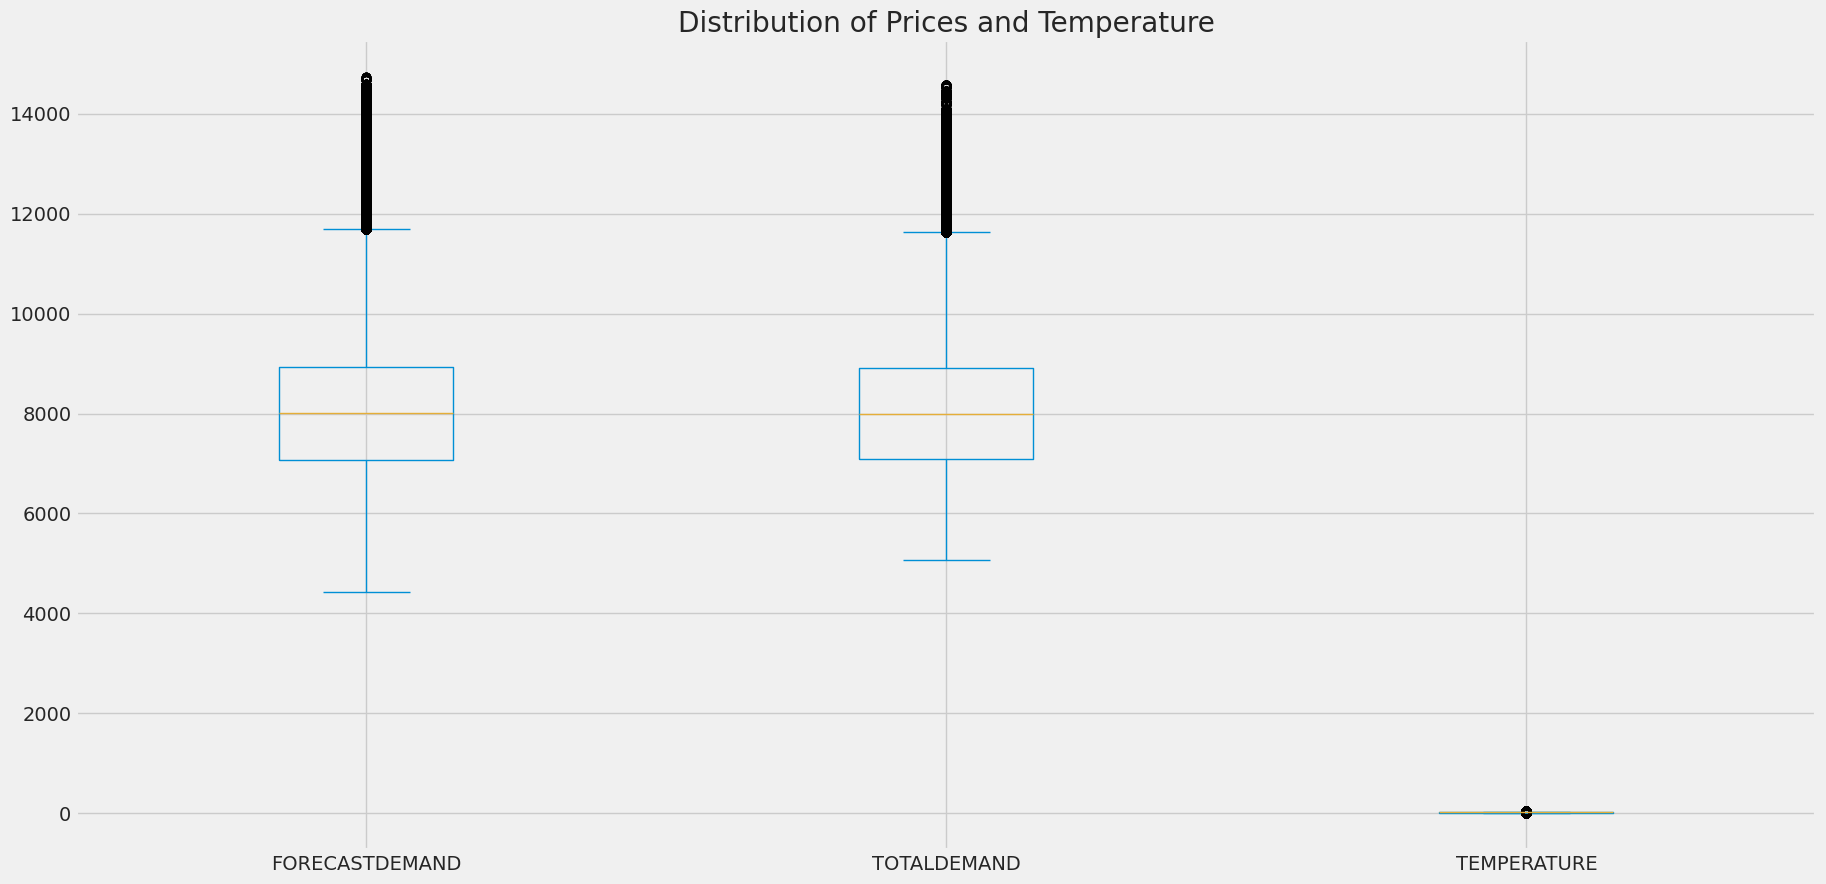

In [1142]:
plt.figure(figsize=(12, 6))
nsw_df[['FORECASTDEMAND', 'TOTALDEMAND', 'TEMPERATURE']].plot(kind='box')
plt.title('Distribution of Prices and Temperature')
plt.show()

## Histogram

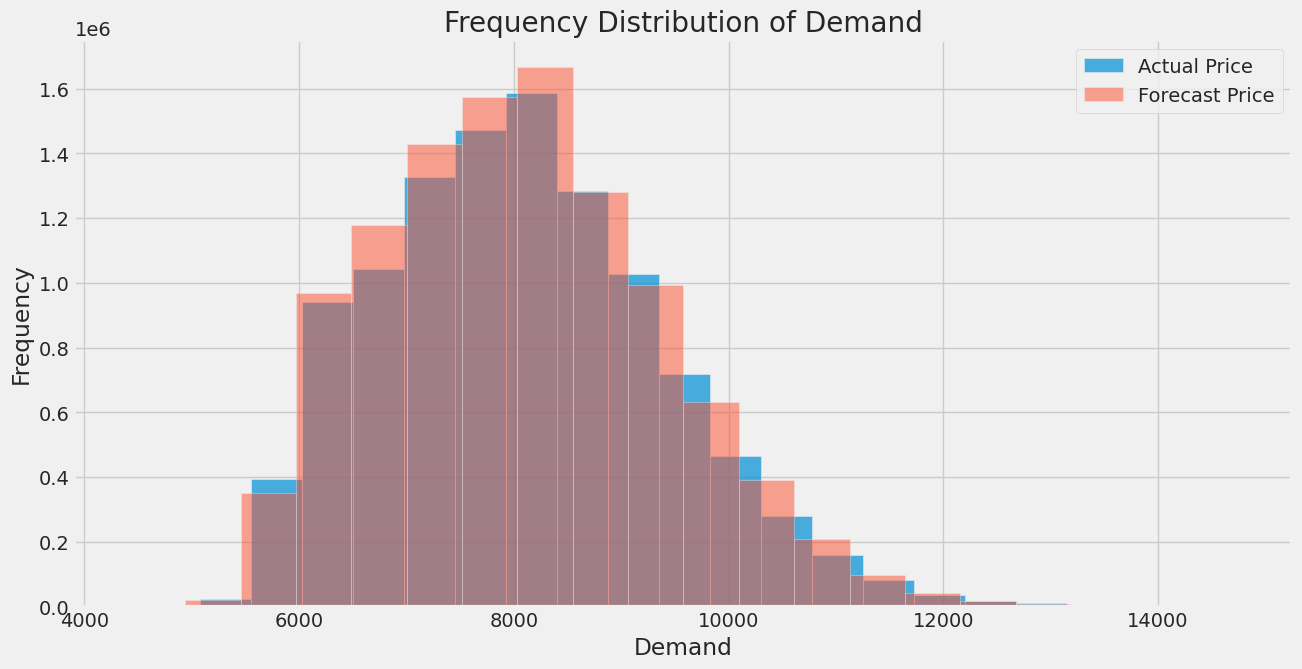

In [1143]:
plt.figure(figsize=(14, 7))
nsw_df['TOTALDEMAND'].hist(alpha=0.7, label='Actual Price', bins=20)
nsw_df['FORECASTDEMAND'].hist(alpha=0.5, label='Forecast Price', bins=20)
plt.xlabel('Demand')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Demand')
plt.legend()
plt.show()

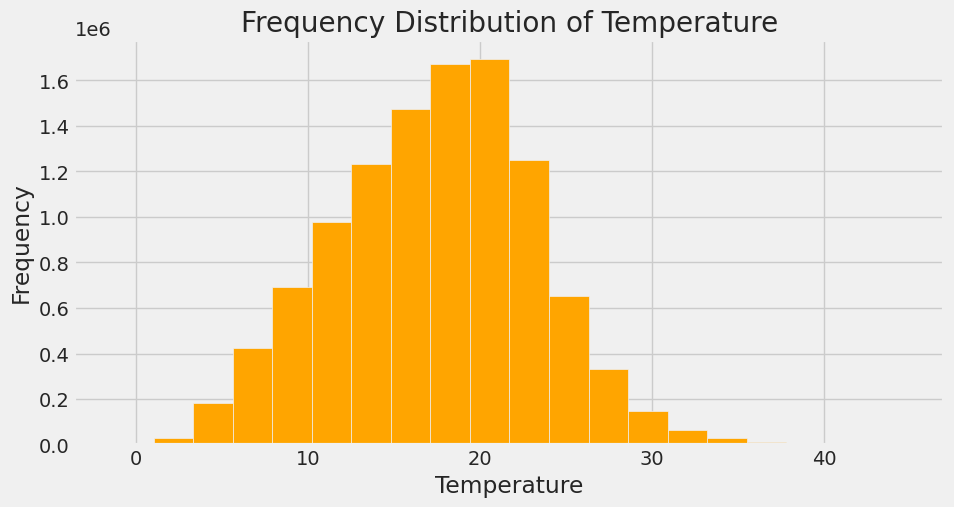

In [1144]:
plt.figure(figsize=(10, 5))
nsw_df['TEMPERATURE'].hist(color='orange', bins=20)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Temperature')
plt.show()

## Correlation 

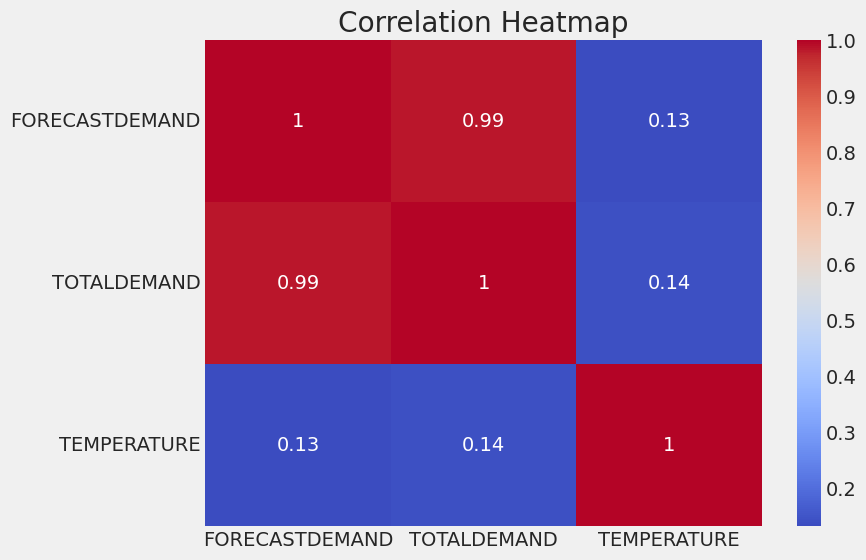

In [1145]:
plt.figure(figsize=(8, 6))
sns.heatmap(nsw_df[['FORECASTDEMAND', 'TOTALDEMAND', 'TEMPERATURE']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## seasonal decomposition (additive)
It's important to have a defined frequency (e.g., 'H' for hourly, 'D' for daily). Let's assume it's hourly data for this example

In [1146]:
nsw_df = nsw_df.asfreq('30min')

Now, choose the demand for electricity for decomposition

In [1147]:
ts = nsw_df['TOTALDEMAND']  # fix_me: missing values
ts.head()

1970-01-01   NaN
Freq: 30min, Name: TOTALDEMAND, dtype: float64

In [1148]:
ts.isnull().sum()

1

In [1149]:
ts.isna().sum()

1

Perform seasonal decomposition. 
compare `model`=`multiplicative` vs `model`=`additive` if necessary

In [1150]:
decomposition = sm.tsa.seasonal_decompose(ts, model='additive')   
# fix_me: deal with missing values, temporarily using ffill

ValueError: This function does not handle missing values

Plot the decomposed components of the time series

In [ ]:
fig = decomposition.plot()
plt.show()

## additive vs multiplicative relationships between components